# 📚 Zipf’s Law in the Lyrics of Taylor Swift

**Zipf’s Law** is a fascinating empirical principle in linguistics and data science, revealing how the frequency of words in natural language follows a predictable mathematical pattern. According to Zipf’s Law, the most frequently used word in a text appears approximately twice as often as the second most frequent word, three times as often as the third, and so on — forming a characteristic curve on a log-log scale.

In this project, we explore whether Taylor Swift’s lyrics — known for their poetic and narrative depth — follow this natural linguistic pattern. Do her words dance to the rhythm of Zipf’s Law?

# 🧑‍🤝‍🧑 Team -
* Sahil Singh - sahil.k@adypu.edu.in
* Abhijeet - abhijeet.k@adypu.edu.in
* Ashish Singh Naruka - ashish.naruka@adypu.edu.in
* Aman Kumar - aman.kumar01@adypu.edu.in

# 📝 Task at Hand
In this notebook, we investigate the applicability of Zipf’s Law to a real-world dataset of **Taylor** **Swift’s** **lyrics**. We will:

* Combine and clean the lyrics of Taylor Swift songs

* Compute the frequency of each unique word

* Rank the words based on how often they appear

* Visualize the relationship between rank and frequency on a log-log scale

* Analyze how closely the results follow the theoretical Zipf distribution


---

# 📊 Visualization Ideas:
* A log-log plot of word rank vs. frequency.

* A bar chart of the top 20 words.

* A Zipf’s curve with an overlay of the expected distribution.

#📘 Storytelling/Insights:

* Does the novel's word frequency follow Zipf’s Law?

* How do character names (e.g., “Harry”, “Hermione”) behave in frequency?

* Compare Zipf’s behavior in different chapters or sections (optional).

# 💡 Why It Matters
Understanding if Taylor Swift’s lyrics adhere to Zipf’s Law isn’t just academic — it reveals deeper insights into her use of language and creativity. Beyond fan appreciation, this analysis supports broader applications such as:

* Identifying stylistic patterns or linguistic anomalies

* Improving natural language processing tools like autocomplete and chatbots

* Enhancing text compression and storage algorithms

* Supporting linguistic modeling in AI systems

By examining how her lyrical expressions align with Zipfian behavior, we can better understand the structure, emotion, and natural rhythm in one of the most influential songwriting catalogs of our time.

In [ ]:

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from collections import Counter
from wordcloud import WordCloud

import plotly.graph_objects as go
df = pd.read_csv('/content/drive/MyDrive/TaylorSwift.csv')
df.head()


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...
1,1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...
2,2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...
3,3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...
4,4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...


In [ ]:
all_lyrics = " ".join(df['Lyric'].dropna().astype(str).tolist())

In [ ]:
def preprocess(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # Remove punctuation/numbers
    return text

clean_lyrics = preprocess(all_lyrics)
words = clean_lyrics.split()

['vintage',
 'tee',
 'brand',
 'new',
 'phone',
 'high',
 'heels',
 'on',
 'cobblestones',
 'when',
 'you',
 'are',
 'young',
 'they',
 'assume',
 'you',
 'know',
 'nothing',
 'sequin',
 'smile',
 'black',
 'lipstick',
 'sensual',
 'politics',
 'when',
 'you',
 'are',
 'young',
 'they',
 'assume',
 'you',
 'know',
 'nothing',
 'but',
 'i',
 'knew',
 'you',
 'dancin',
 'in',
 'your',
 'levis',
 'drunk',
 'under',
 'a',
 'streetlight',
 'i',
 'i',
 'knew',
 'you',
 'hand',
 'under',
 'my',
 'sweatshirt',
 'baby',
 'kiss',
 'it',
 'better',
 'i',
 'refrain',
 'and',
 'when',
 'i',
 'felt',
 'like',
 'i',
 'was',
 'an',
 'old',
 'cardigan',
 'under',
 'someones',
 'bed',
 'you',
 'put',
 'me',
 'on',
 'and',
 'said',
 'i',
 'was',
 'your',
 'favorite',
 'a',
 'friend',
 'to',
 'all',
 'is',
 'a',
 'friend',
 'to',
 'none',
 'chase',
 'two',
 'girls',
 'lose',
 'the',
 'one',
 'when',
 'you',
 'are',
 'young',
 'they',
 'assume',
 'you',
 'know',
 'nothing',
 'but',
 'i',
 'knew',
 'you',
 

In [ ]:
word_counts = Counter(words)
most_common = word_counts.most_common()

# Convert to DataFrame
df_freq = pd.DataFrame(most_common, columns=['word', 'frequency'])
df_freq['rank'] = np.arange(1, len(df_freq)+1)

,word,frequency,rank
0,you,6687,1
1,i,6198,2
2,the,5252,3
3,and,4226,4
4,to,3041,5
...,...,...,...
6496,twister,1,6497
6497,paddle,1,6498
6498,someplace,1,6499
6499,r,1,6500


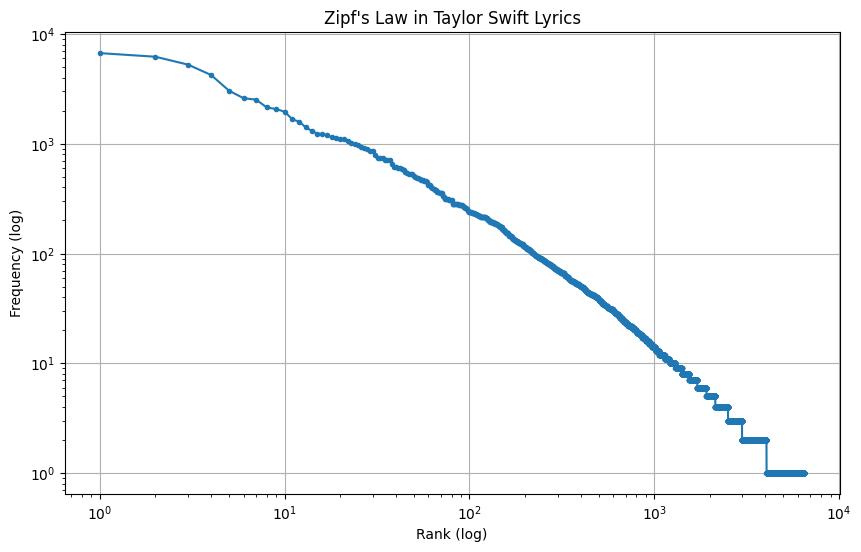

In [ ]:
plt.figure(figsize=(10, 6))
plt.loglog(df_freq['rank'], df_freq['frequency'], marker='.')
plt.title("Zipf's Law in Taylor Swift Lyrics")
plt.xlabel("Rank (log)")
plt.ylabel("Frequency (log)")
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import linregress

log_rank = np.log(df_freq['rank'])
log_freq = np.log(df_freq['frequency'])

slope, intercept, r_value, _, _ = linregress(log_rank, log_freq)

print(f"Slope: {slope:.2f}, R²: {r_value**2:.4f}")


Slope: -1.42, R²: 0.9784


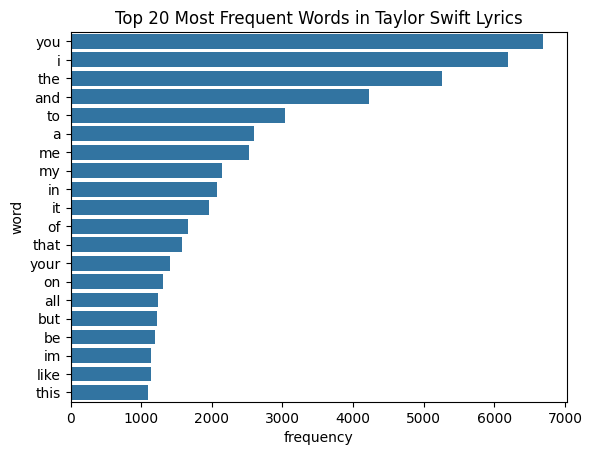

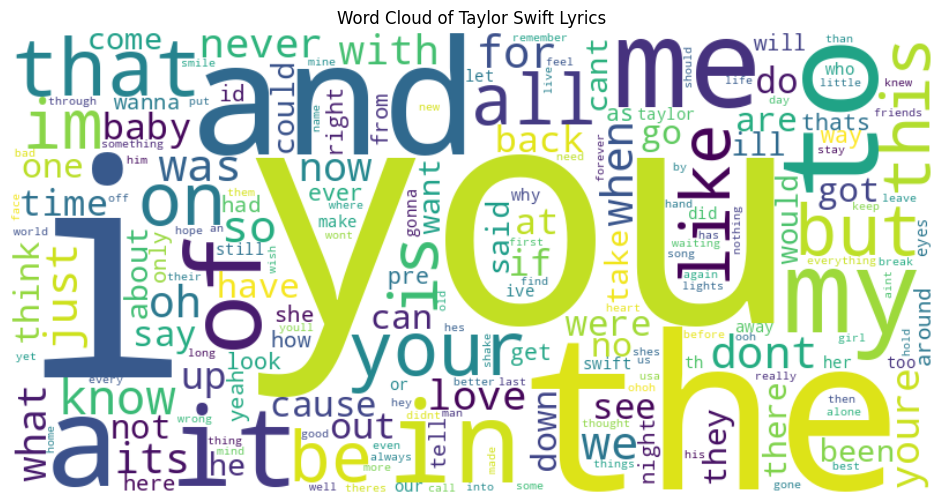

In [ ]:
# Top 20 words
sns.barplot(data=df_freq.head(20), x='frequency', y='word')
plt.title("Top 20 Most Frequent Words in Taylor Swift Lyrics")
plt.show()

# Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Taylor Swift Lyrics")
plt.show()


# 👥 Team Contribution Breakdown
# 🧑‍💻 Member 1: Data Collection & Preprocessing
> **Aman Kumar**

* Responsible for exploring and cleaning the Taylor Swift lyrics dataset

* Removed punctuation, special characters, and standardized the text

* Tokenized the lyrics into individual words for analysis

* Ensured the dataset was ready for frequency and Zipf analysis

# 📊 Member 2: Frequency Analysis & Zipf’s Law Application
> **Ashish Singh Naruka**

* Counted the frequency of each unique word in the lyrics

* Ranked the words by frequency and prepared the log-log scale data

* Applied Zipf’s Law and fitted the distribution

* Calculated the regression line and R² value to validate Zipfian behavior

# 📈 Member 3: Data Visualization & Insights -

> **Sahil Singh**

* Created graphs (log-log plot, bar plot of top words, word cloud)

* Visualized rank vs. frequency and highlighted key findings

* Interpreted the plots and identified patterns or anomalies in the lyrics

* Contributed to storytelling through visuals and theme-aligned design

# 🖼️ Member 4: Documentation & Presentation (PPT)
> **Abhijeet**

* Drafted and formatted the Google Colab notebook with explanations and markdowns

* Wrote the final insights and conclusions based on results

* Designed the PowerPoint presentation for final submission

* Included plots, summaries, and interpretation of Zipf’s Law in Taylor Swift’s lyrics